In [ ]:
# Install spaCy if not already installed
!pip install -U spacy

# Download spaCy English model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.2
    Uninstalling spacy-3.7.2:
      Successfully uninstalled spacy-3.7.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('words')
from nltk.corpus import words
english_words = words.words()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 13.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load financial dataset
financial_data_path = '/content/drive/MyDrive/Financial2.xlsx'
financial_data = pd.read_excel(financial_data_path)

# Load mapped responses
mapped_responses_path = '/content/drive/MyDrive/mapping.xlsx'
mapped_responses = pd.read_excel(mapped_responses_path)
financial_data


,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Cash Flow from Investing,Cash Flow from Financial Activities,Current Ratio,Debtor Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity
0,2022,APPLE,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,-22354.0,-110749.0,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589
1,2021,APPLE,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,-14545.0,-93353.0,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713
2,2020,APPLE,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,-4289.0,-86820.0,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664
3,2019,APPLE,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,45896.0,-90976.0,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645
4,2018,APPLE,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,16066.0,-87876.0,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2013,AT&T,Telecommunication,188.85,128752.0,77561.0,18418.0,3.42,49147.0,91482.0,...,-23124.0,-13201.0,0.6628,0.8175,20.4652,6.7397,11.6451,14.3050,-0.8139,-46.8015
367,2012,AT&T,Telecommunication,195.32,127434.0,72206.0,7264.0,1.25,31140.0,92695.0,...,-19680.0,-17673.0,0.7143,0.7535,8.1331,2.7685,4.7399,5.7002,0.9269,-21.0275
368,2011,AT&T,Telecommunication,179.26,126723.0,71819.0,3944.0,0.66,30505.0,105797.0,...,-21250.0,-11649.0,0.7440,0.6120,3.9547,1.5471,2.5039,3.1123,-0.1833,-17.1560
369,2010,AT&T,Telecommunication,173.72,124280.0,74023.0,19864.0,3.35,39037.0,111950.0,...,-21449.0,-15849.0,0.5983,0.5910,17.3292,7.2014,11.3503,15.9833,-0.3707,-87.5017


In [ ]:
# Print column names and first few rows of mapped_responses DataFrame
#print(mapped_responses.columns)
#print(mapped_responses.head())

You: hello
Investo: Hello, I'm investo. How are you doing today?
You: how are you doing?
Investo: Excellent. What financial query I can help you with today?
You: predict revenue
Revenue Data:
Year: 2022, Revenue: 394328
Year: 2021, Revenue: 365817
Year: 2020, Revenue: 274515
Year: 2019, Revenue: 260174
Year: 2018, Revenue: 265595
Year: 2017, Revenue: 229234
Year: 2016, Revenue: 215639
Year: 2015, Revenue: 233715
Year: 2014, Revenue: 182795
Year: 2013, Revenue: 170910
Year: 2012, Revenue: 156508
Year: 2011, Revenue: 108249
Year: 2010, Revenue: 65225
Year: 2009, Revenue: 42905


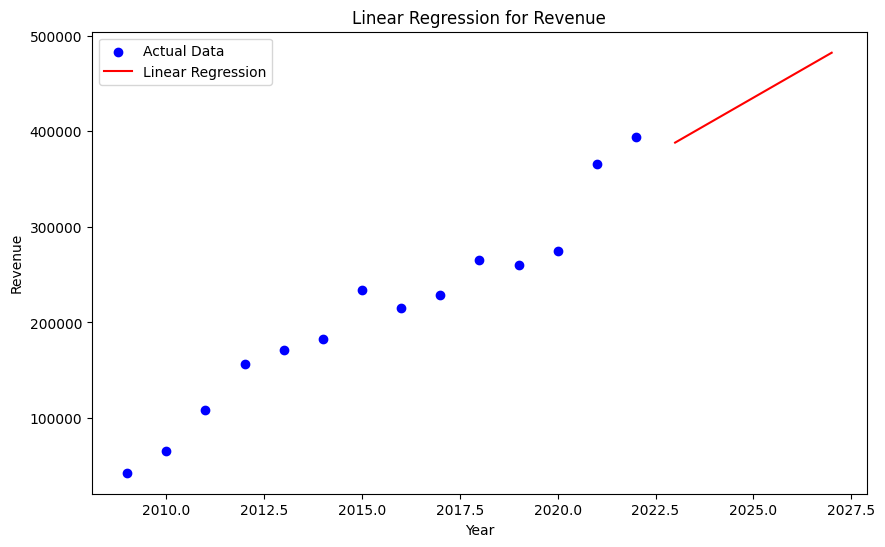

Investo: Predicted Revenue for the next 5 years: [388066.57142857 411564.88571429 435063.2        458561.51428572
 482059.82857143]
You: bye
Investo: Goodbye! Have a great day.


In [ ]:
# Assuming you have financial_data and mapped_responses defined previously

# Implement cosine similarity function
def calculate_cosine_similarity(query, keywords):
    # Calculate cosine similarity between query and keywords
    similarity_scores = cosine_similarity(query, keywords)
    return similarity_scores

# Function to perform linear regression for a specific financial term
def linear_regression_for_term(financial_term):
    # Extract data for the specific financial term
    X = financial_data["Year"].values
    y = financial_data[financial_term].values
    # Train linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    # Predict values for the next 5 years
    future_years = np.arange(financial_data.Year.max() + 1, financial_data.Year.max() + 6).reshape(-1, 1)
    predicted_values = model.predict(future_years)

    # Print all the available data for the financial term
    print(f"{financial_term} Data:")
    for year, value in zip(X, y):
        print(f"Year: {year}, {financial_term}: {value}")

    # Print the predicted data for the next 5 years
    #print(f"\nPredicted {financial_term} for the next 5 years:")
    #for year, predicted_value in zip(future_years.flatten(), predicted_values):
        #print(f"Year: {year}, Predicted {financial_term}: {predicted_value}")

    return future_years, predicted_values

# Function to plot the linear regression
def plot_linear_regression(financial_term, future_years, predicted_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(financial_data["Year"], financial_data[financial_term], color='blue', label='Actual Data')
    plt.plot(future_years, predicted_values, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel(financial_term)
    plt.title('Linear Regression for ' + financial_term)
    plt.legend()
    plt.show()

# Function to detect financial term from user query
def detect_financial_term(user_query):
    financial_terms = ["Market Cap","Revenue","Gross Profit","Net Income","Earning Per Share","EBITDA","Share Holder Equity","Cash Flow from Operating","Cash Flow from Investing","Cash Flow from Financial Activities","Current Ratio","Debt/Equity Ratio","ROE","ROA","ROI","Net Profit Margin","Free Cash Flow per Share","Return on Tangible Equity"]
    # Iterate over each financial term and check if it appears in the user query
    for term in financial_terms:
        if re.search(r'\b' + re.escape(str(term)) + r'\b', user_query, re.IGNORECASE):
            return term  # Return the detected financial term
    return None  # Return None if no financial term is detected

# Modify the handle_user_query function to call linear regression function if specified
def handle_user_query(user_query):
    # Preprocess user query
    vectorizer = TfidfVectorizer()
    user_query_vectorized = vectorizer.fit_transform([user_query])

    # Extract keywords, functions, and responses from mapped_responses DataFrame
    keywords = vectorizer.transform(mapped_responses['keywords'].values)
    functions = mapped_responses['function'].values
    responses = mapped_responses['response'].values

    # Calculate cosine similarity between user query and keywords
    similarity_scores = calculate_cosine_similarity(user_query_vectorized, keywords)

    # Find index of highest similarity score
    max_index = np.argmax(similarity_scores)

    # Get function and response corresponding to highest similarity score
    function = functions[max_index]
    response = responses[max_index]

    # If a function is specified, call the function
    if not pd.isnull(function):
        if function == 'linear':
            # Detect financial term from user query
            financial_term = detect_financial_term(user_query)
            if financial_term:
                future_years, predicted_values = linear_regression_for_term(financial_term)
                plot_linear_regression(financial_term, future_years, predicted_values)
                response = f"Predicted {financial_term} for the next 5 years: {predicted_values}"
            else:
                response = "Financial term not detected in the user query."
        else:
            return globals()[function]()  # Call other specified function

    # If a response is specified, return the response
    elif not pd.isnull(response):
        return response

    return response  # Return the response at the end of the function

# Example usage
while True:
    user_input = input("You: ")

    # If user input contains "bye", break the loop
    if "bye" in user_input.lower():
        print("Investo: Goodbye! Have a great day.")
        break

    # If user input is not a greeting or goodbye, handle as a regular query
    response = handle_user_query(user_input)
    print("Investo:", response)


Multiple companies

You: Gross profit for MICROSOFT
Gross Profit Data:
Year: 2023, Gross Profit: 146052.0
Year: 2022, Gross Profit: 135620.0
Year: 2021, Gross Profit: 115856.0
Year: 2020, Gross Profit: 96937.0
Year: 2019, Gross Profit: 82933.0
Year: 2018, Gross Profit: 72007.0
Year: 2017, Gross Profit: 62310.0
Year: 2016, Gross Profit: 58374.0
Year: 2015, Gross Profit: 60542.0
Year: 2014, Gross Profit: 59755.0
Year: 2013, Gross Profit: 57464.0
Year: 2012, Gross Profit: 56193.0
Year: 2011, Gross Profit: 54366.0
Year: 2010, Gross Profit: 50089.0
Year: 2009, Gross Profit: 46282.0


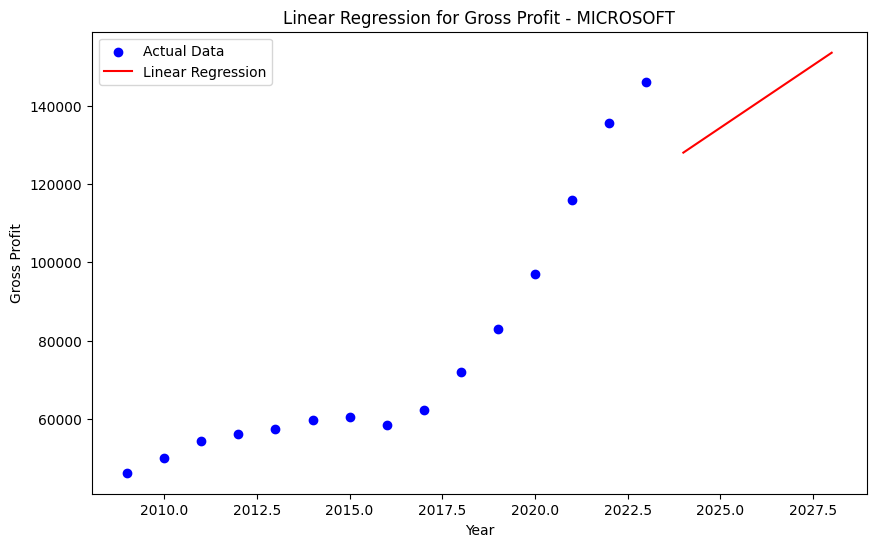

Investo: Predicted Gross Profit for the next 5 years: [127976.21904762 134350.07976191 140723.94047619 147097.80119048
 153471.66190476]
You: bye
Investo: Goodbye! Have a great day.


In [ ]:
# Assuming you have financial_data and mapped_responses defined previously

# Implement cosine similarity function
def calculate_cosine_similarity(query, keywords):
    # Calculate cosine similarity between query and keywords
    similarity_scores = cosine_similarity(query, keywords)
    return similarity_scores
# Mapping of company names to their identifiers
company_mapping = {
    "company1": "APPLE","company2": "MICROSOFT","company3": "ALPHABET","company4": "PAYPAL","company5": "AIG","company6": "PCG","company7": "SHLDQ","company8": "MCD",
    "company9": "BCS","company10": "NVIDIA","company11": "INTEL","company12": "AMAZON","company13": "TOYOTA MOTOR CORPORATION","company14": "VOLKSWAGEN GROUP","company15": "FORD MOTOR COMPANY","company16": "GENERAL MOTORS",
    "company17": "HONDA MOTOR CO. LTD", "company18": "META", "company19": "PEPSICO", "company20": "COCACOLA", "company21": "STARBUCKS", "company22": "DOMINO'S PIZZA", "company23": "CHARTER COMMUNICATIONS", "company24": "ROGERS COMMUNICATION",
    "company25": "COMCAST", "company26": "VERIZON COMMUNICATIONS", "company27": "AT&T"
     #Add more companies as needed
}

# Function to perform linear regression for a specific financial term and company
def linear_regression_for_term(financial_term, company):
    # Extract data for the specific financial term and company
    company_data = financial_data[financial_data['Company'] == company]
    X = company_data["Year"].values
    y = company_data[financial_term].values
    # Train linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    # Predict values for the next 5 years
    future_years = np.arange(X.max() + 1, X.max() + 6).reshape(-1, 1)
    predicted_values = model.predict(future_years)
    # Print all the available data for the financial term
    print(f"{financial_term} Data:")
    for year, value in zip(X, y):
        print(f"Year: {year}, {financial_term}: {value}")
    return future_years, predicted_values

# Function to plot the linear regression
def plot_linear_regression(financial_term, future_years, predicted_values, company):
    company_data = financial_data[financial_data['Company'] == company]
    plt.figure(figsize=(10, 6))
    plt.scatter(company_data["Year"], company_data[financial_term], color='blue', label='Actual Data')
    plt.plot(future_years, predicted_values, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel(financial_term)
    plt.title(f'Linear Regression for {financial_term} - {company}')
    plt.legend()
    plt.show()

# Modify the handle_user_query function to call linear regression function if specified
def handle_user_query(user_query, company):
    # Preprocess user query
    vectorizer = TfidfVectorizer()
    user_query_vectorized = vectorizer.fit_transform([user_query])

    # Extract keywords, functions, and responses from mapped_responses DataFrame
    keywords = vectorizer.transform(mapped_responses['keywords'].values)
    functions = mapped_responses['function'].values
    responses = mapped_responses['response'].values

    # Calculate cosine similarity between user query and keywords
    similarity_scores = calculate_cosine_similarity(user_query_vectorized, keywords)

    # Find index of highest similarity score
    max_index = np.argmax(similarity_scores)

    # Get function and response corresponding to highest similarity score
    function = functions[max_index]
    response = responses[max_index]

    # If a function is specified, call the function
    if not pd.isnull(function):
        if function == 'linear':
            # Detect financial term from user query
            financial_term = detect_financial_term(user_query)
            if financial_term:
                future_years, predicted_values = linear_regression_for_term(financial_term, company)
                plot_linear_regression(financial_term, future_years, predicted_values, company)
                response = f"Predicted {financial_term} for the next 5 years: {predicted_values}"
            else:
                response = "Financial term not detected in the user query."
        else:
            return globals()[function]()  # Call other specified function

    # If a response is specified, return the response
    elif not pd.isnull(response):
        return response

    return response  # Return the response at the end of the function

# Example usage
while True:
    user_input = input("You: ")

    # If user input contains "bye", break the loop
    if "bye" in user_input.lower():
        print("Investo: Goodbye! Have a great day.")
        break

    # Extract the company from user input
    company_pattern = r'\b(?:' + '|'.join(re.escape(company) for company in company_mapping.values()) + r')\b'
    match = re.search(company_pattern, user_input, re.IGNORECASE)

    if match:
        company = match.group(0)
    else:
        print("Error: Company not recognized.")
        continue  # Prompt user again for input

    # If user input is not a greeting or goodbye, handle as a regular query
    response = handle_user_query(user_input, company)
    print("Investo:", response)

In [ ]:
from spellchecker import SpellChecker

spell_checker = SpellChecker()
# Assuming you have financial_data and mapped_responses defined previously

# Implement cosine similarity function
def calculate_cosine_similarity(query, keywords):
    # Calculate cosine similarity between query and keywords
    similarity_scores = cosine_similarity(query, keywords)
    return similarity_scores
# Mapping of company names to their identifiers
company_mapping = {
    "company1": "APPLE","company2": "MICROSOFT","company3": "ALPHABET","company4": "PAYPAL","company5": "AIG","company6": "PCG","company7": "SHLDQ","company8": "MCD",
    "company9": "BCS","company10": "NVIDIA","company11": "INTEL","company12": "AMAZON","company13": "TOYOTA MOTOR CORPORATION","company14": "VOLKSWAGEN GROUP","company15": "FORD MOTOR COMPANY","company16": "GENERAL MOTORS",
    "company17": "HONDA MOTOR CO. LTD", "company18": "META", "company19": "PEPSICO", "company20": "COCACOLA", "company21": "STARBUCKS", "company22": "DOMINO'S PIZZA", "company23": "CHARTER COMMUNICATIONS", "company24": "ROGERS COMMUNICATION",
    "company25": "COMCAST", "company26": "VERIZON COMMUNICATIONS", "company27": "AT&T"
     #Add more companies as needed
}

# Function to perform linear regression for a specific financial term and company
def linear_regression_for_term(financial_term, company):
    # Extract data for the specific financial term and company
    company_data = financial_data[financial_data['Company'] == company]
    X = company_data["Year"].values
    y = company_data[financial_term].values
    # Train linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    # Predict values for the next 5 years
    future_years = np.arange(X.max() + 1, X.max() + 6).reshape(-1, 1)
    predicted_values = model.predict(future_years)
    # Print all the available data for the financial term
    print(f"{financial_term} Data:")
    for year, value in zip(X, y):
        print(f"Year: {year}, {financial_term}: {value}")
    return future_years, predicted_values

# Function to plot the linear regression
def plot_linear_regression(financial_term, future_years, predicted_values, company):
    company_data = financial_data[financial_data['Company'] == company]
    plt.figure(figsize=(10, 6))
    plt.scatter(company_data["Year"], company_data[financial_term], color='blue', label='Actual Data')
    plt.plot(future_years, predicted_values, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel(financial_term)
    plt.title(f'Linear Regression for {financial_term} - {company}')
    plt.legend()
    plt.show()

# Modify the handle_user_query function to call linear regression function if specified
def handle_user_query(user_query, company):
    # Preprocess user query
    vectorizer = TfidfVectorizer()
    user_query_vectorized = vectorizer.fit_transform([user_query])

    # Extract keywords, functions, and responses from mapped_responses DataFrame
    keywords = vectorizer.transform(mapped_responses['keywords'].values)
    functions = mapped_responses['function'].values
    responses = mapped_responses['response'].values

    # Calculate cosine similarity between user query and keywords
    similarity_scores = calculate_cosine_similarity(user_query_vectorized, keywords)

    # Find index of highest similarity score
    max_index = np.argmax(similarity_scores)

    # Get function and response corresponding to highest similarity score
    function = functions[max_index]
    response = responses[max_index]

    # If a function is specified, call the function
    if not pd.isnull(function):
        if function == 'linear':
            # Detect financial term from user query
            financial_term = detect_financial_term(user_query)
            if financial_term:
                future_years, predicted_values = linear_regression_for_term(financial_term, company)
                plot_linear_regression(financial_term, future_years, predicted_values, company)
                response = f"Predicted {financial_term} for the next 5 years: {predicted_values}"
            else:
                response = "Financial term not detected in the user query."
        else:
            return globals()[function]()  # Call other specified function

    # If a response is specified, return the response
    elif not pd.isnull(response):
        return response

    return response  # Return the response at the end of the function

# Function to correct spelling in user query
def correct_spelling(user_query):
    corrected_query = []
    # Split user query into words and correct each word
    for word in user_query.split():
        corrected_query.append(spell_checker.correction(word))
    # Join corrected words back into a single string
    return ' '.join(corrected_query)

# Example usage
while True:
    user_input = input("You: ")

    # If user input contains "bye", break the loop
    if "bye" in user_input.lower():
        print("Investo: Goodbye! Have a great day.")
        break

    # Correct spelling in user input
    corrected_input = correct_spelling(user_input)

    # Extract the company from user input
    company_pattern = r'\b(?:' + '|'.join(re.escape(company) for company in company_mapping.values()) + r')\b'
    match = re.search(company_pattern, corrected_input, re.IGNORECASE)

    if match:
        company = match.group(0)
    else:
        print("Error: Company not recognized.")
        continue  # Prompt user again for input

    # If user input is not a greeting or goodbye, handle as a regular query
    response = handle_user_query(corrected_input, company)
    print("Investo:", response)

You: byr
Error: Company not recognized.
You: bye
Investo: Goodbye! Have a great day.
